In [23]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [24]:
data = pd.read_csv("personenmobiliteit incl. namen.csv", delimiter=',', index_col='ID')
display(data)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
ID,,,,,,,,,,,
0,10000,Totaal,Totaal,Nederland,2010,2.77,30.31,62.54,963.0,10536.0,362.3
1,10000,Totaal,Totaal,Nederland,2011,2.67,30.69,61.33,928.0,10675.0,355.5
2,10000,Totaal,Totaal,Nederland,2012,2.68,29.39,60.45,936.0,10253.0,351.5
3,10000,Totaal,Totaal,Nederland,2013,2.68,30.49,61.18,933.0,10611.0,354.8
4,10000,Totaal,Totaal,Nederland,2014,2.69,30.74,62.74,937.0,10694.0,363.8
...,...,...,...,...,...,...,...,...,...,...,...
126715,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2013,NaN,NaN,NaN,NaN,NaN,NaN
126716,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2014,NaN,NaN,NaN,NaN,NaN,NaN
126717,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data = data[['Populatie', 'Vervoerwijzen', 'KenmerkenVerplaatsing', 'RegioS', 'Perioden', 'Afstand_2']]
population_total = data[data['Populatie'].isin([10000])] # filter data on total population (uitsluiten van alleen populatie 12 jaar of ouder)
car = population_total[population_total['Vervoerwijzen'].isin(['Auto (passagier)', 'Auto (bestuurder)', 'Trein'])] # filter data on cars
display(car)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2
ID,,,,,,
7040,10000,Auto (bestuurder),Totaal,Nederland,2010,15.33
7041,10000,Auto (bestuurder),Totaal,Nederland,2011,16.00
7042,10000,Auto (bestuurder),Totaal,Nederland,2012,15.28
7043,10000,Auto (bestuurder),Totaal,Nederland,2013,15.63
7044,10000,Auto (bestuurder),Totaal,Nederland,2014,15.57
...,...,...,...,...,...,...
28155,10000,Trein,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2013,NaN
28156,10000,Trein,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2014,NaN
28157,10000,Trein,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2015,NaN


In [26]:
car_total = car[car['KenmerkenVerplaatsing'].isin(['Totaal'])]
display(car_total)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2
ID,,,,,,
7040,10000,Auto (bestuurder),Totaal,Nederland,2010,15.33
7041,10000,Auto (bestuurder),Totaal,Nederland,2011,16.00
7042,10000,Auto (bestuurder),Totaal,Nederland,2012,15.28
7043,10000,Auto (bestuurder),Totaal,Nederland,2013,15.63
7044,10000,Auto (bestuurder),Totaal,Nederland,2014,15.57
...,...,...,...,...,...,...
21291,10000,Trein,Totaal,Niet stedelijk,2013,1.51
21292,10000,Trein,Totaal,Niet stedelijk,2014,1.30
21293,10000,Trein,Totaal,Niet stedelijk,2015,1.39


In [27]:
car_per_month = car[car['KenmerkenVerplaatsing'].isin(['Verplaatsing in januari', 
                                                       'Verplaatsing in februari', 
                                                       'Verplaatsing in maart', 
                                                       'Verplaatsing in april', 
                                                       'Verplaatsing in mei', 
                                                       'Verplaatsing in juni',
                                                       'Verplaatsing in juli',
                                                       'Verplaatsing in augustus',
                                                       'Verplaatsing in september',
                                                       'Verplaatsing in oktober',
                                                       'Verplaatsing in november',
                                                       'Verplaatsing in december'])]

display(car_per_month)                                 

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2
ID,,,,,,
10912,10000,Auto (bestuurder),Verplaatsing in januari,Nederland,2010,15.96
10913,10000,Auto (bestuurder),Verplaatsing in januari,Nederland,2011,15.90
10914,10000,Auto (bestuurder),Verplaatsing in januari,Nederland,2012,15.80
10915,10000,Auto (bestuurder),Verplaatsing in januari,Nederland,2013,13.80
10916,10000,Auto (bestuurder),Verplaatsing in januari,Nederland,2014,15.73
...,...,...,...,...,...,...
27099,10000,Trein,Verplaatsing in december,Niet stedelijk,2013,NaN
27100,10000,Trein,Verplaatsing in december,Niet stedelijk,2014,NaN
27101,10000,Trein,Verplaatsing in december,Niet stedelijk,2015,NaN


In [28]:
kenmerken_months = ['Verplaatsing in januari', 
                    'Verplaatsing in februari',
                    'Verplaatsing in maart',
                    'Verplaatsing in april',
                    'Verplaatsing in mei',
                    'Verplaatsing in juni',
                    'Verplaatsing in juli',
                    'Verplaatsing in augustus',
                    'Verplaatsing in september',
                    'Verplaatsing in oktober',
                    'Verplaatsing in november',
                    'Verplaatsing in december',]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

replace_dict = dict(zip(kenmerken_months, months))
car_per_month['KenmerkenVerplaatsing'] = car_per_month['KenmerkenVerplaatsing'].replace(replace_dict)

display(car_per_month)


C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\309921106.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_per_month['KenmerkenVerplaatsing'] = car_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\309921106.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_per_month['KenmerkenVerplaatsing'] = car_per_month['KenmerkenVerplaatsing'].replace(replace_dict)


,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2
ID,,,,,,
10912,10000,Auto (bestuurder),1,Nederland,2010,15.96
10913,10000,Auto (bestuurder),1,Nederland,2011,15.90
10914,10000,Auto (bestuurder),1,Nederland,2012,15.80
10915,10000,Auto (bestuurder),1,Nederland,2013,13.80
10916,10000,Auto (bestuurder),1,Nederland,2014,15.73
...,...,...,...,...,...,...
27099,10000,Trein,12,Niet stedelijk,2013,NaN
27100,10000,Trein,12,Niet stedelijk,2014,NaN
27101,10000,Trein,12,Niet stedelijk,2015,NaN


In [29]:
car_per_month.loc[:, 'Dag'] = 1

car_per_month['Datum'] = (
    car_per_month['Perioden'].astype(str) + '-' +
    car_per_month['KenmerkenVerplaatsing'].astype(str).str.zfill(2) + '-' +
    car_per_month['Dag'].astype(str).str.zfill(2)
)
car_per_month['Datum'] = pd.to_datetime(car_per_month['Datum'])
car_per_month.set_index('Datum', inplace=True)

display(car_per_month)


C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\603811144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_per_month.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\603811144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_per_month['Datum'] = (
C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\603811144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2,Dag
Datum,,,,,,,
2010-01-01,10000,Auto (bestuurder),1,Nederland,2010,15.96,1
2011-01-01,10000,Auto (bestuurder),1,Nederland,2011,15.90,1
2012-01-01,10000,Auto (bestuurder),1,Nederland,2012,15.80,1
2013-01-01,10000,Auto (bestuurder),1,Nederland,2013,13.80,1
2014-01-01,10000,Auto (bestuurder),1,Nederland,2014,15.73,1
...,...,...,...,...,...,...,...
2013-12-01,10000,Trein,12,Niet stedelijk,2013,NaN,1
2014-12-01,10000,Trein,12,Niet stedelijk,2014,NaN,1
2015-12-01,10000,Trein,12,Niet stedelijk,2015,NaN,1


,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2,Dag
Datum,,,,,,,
2010-01-01,10000,Auto (bestuurder),1,Nederland,2010,15.96,1
2011-01-01,10000,Auto (bestuurder),1,Nederland,2011,15.90,1
2012-01-01,10000,Auto (bestuurder),1,Nederland,2012,15.80,1
2013-01-01,10000,Auto (bestuurder),1,Nederland,2013,13.80,1
2014-01-01,10000,Auto (bestuurder),1,Nederland,2014,15.73,1
...,...,...,...,...,...,...,...
2013-12-01,10000,Trein,12,Nederland,2013,3.03,1
2014-12-01,10000,Trein,12,Nederland,2014,2.65,1
2015-12-01,10000,Trein,12,Nederland,2015,2.29,1


C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\3530259407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_bestuurder.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\3530259407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_passagier.sort_index(inplace=True)


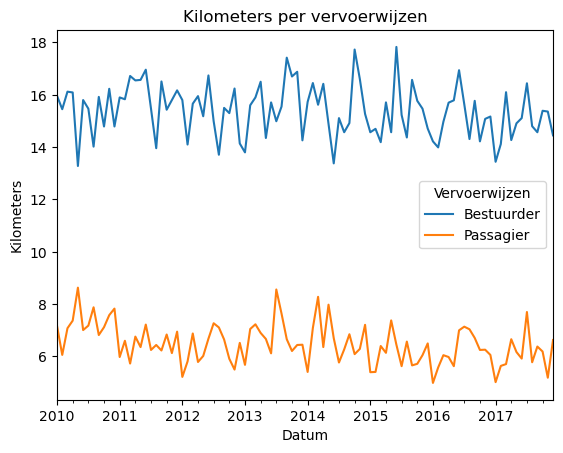

In [32]:
car_Nederland = car_per_month[car_per_month['RegioS'] == 'Nederland']
display(car_Nederland)

car_bestuurder = car_Nederland[car_Nederland['Vervoerwijzen'] == 'Auto (bestuurder)']
car_passagier = car_Nederland[car_Nederland['Vervoerwijzen'] == 'Auto (passagier)']

car_bestuurder.sort_index(inplace=True)
car_passagier.sort_index(inplace=True)

car_bestuurder['Afstand_2'].plot(label='Bestuurder')
car_passagier['Afstand_2'].plot(label='Passagier')

plt.title('Kilometers per vervoerwijzen')
plt.xlabel('Datum')
plt.ylabel('Kilometers')
plt.legend(title='Vervoerwijzen')

plt.show()

,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,15.96,7.17,23.13,1.94
2010-02-01,15.45,6.06,21.51,2.94
2010-03-01,16.12,7.08,23.20,2.36
2010-04-01,16.09,7.37,23.46,2.55
2010-05-01,13.28,8.63,21.91,2.26
...,...,...,...,...
2017-08-01,14.80,5.78,20.58,2.09
2017-09-01,14.57,6.38,20.95,3.39
2017-10-01,15.39,6.19,21.58,3.54


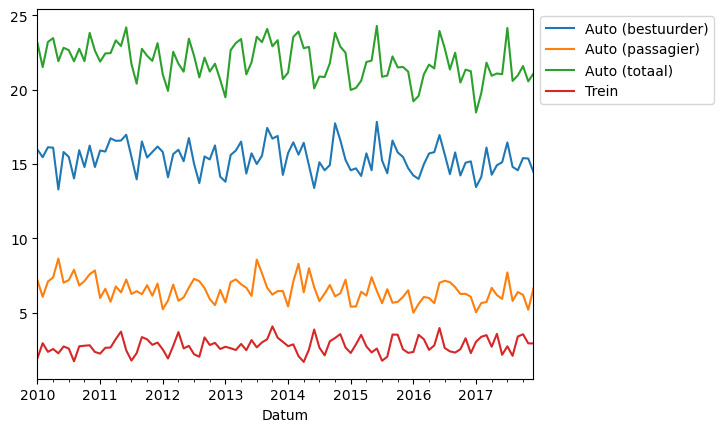

In [38]:
trein = car_Nederland[car_Nederland['Vervoerwijzen'] == 'Trein']

data_Nederland = car_bestuurder[['Afstand_2']].copy()
data_Nederland.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
data_Nederland['Auto (passagier)'] = car_passagier[['Afstand_2']]
data_Nederland['Auto (totaal)'] = data_Nederland['Auto (bestuurder)'] + data_Nederland['Auto (passagier)']
data_Nederland['Trein'] = trein[['Afstand_2']]
display(data_Nederland)

data_Nederland.plot()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

C:\Users\brigi\AppData\Local\Temp\ipykernel_23452\1454925247.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  jaarlijkse_afstand = data_Nederland.resample('Y').mean()


<Axes: xlabel='Datum'>

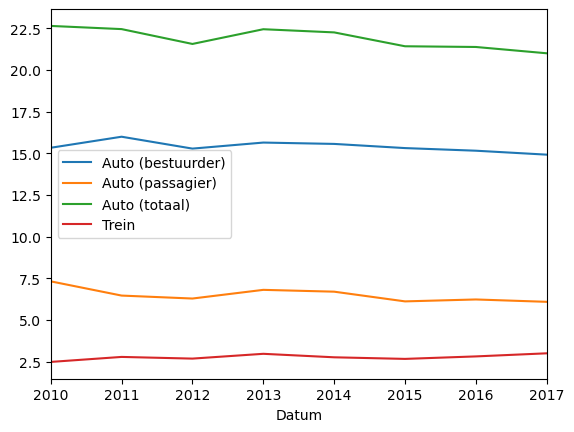

In [41]:
jaarlijkse_afstand = data_Nederland.resample('Y').mean()
jaarlijkse_afstand.plot()